In [9]:
import pandas as pd
inputFile = './chapter5/demo/data/arima_data.xls'
data = pd.read_excel(inputFile, index_col='日期')
data.head()

,销量
日期,
2015-01-01,3023
2015-01-02,3039
2015-01-03,3056
2015-01-04,3138
2015-01-05,3188


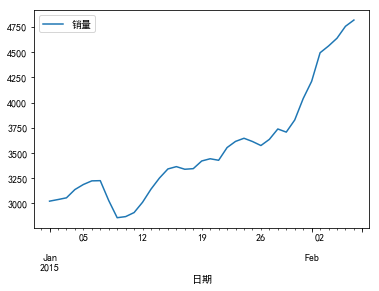

In [10]:
# 时序图
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 正常显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
data.plot()
plt.show()

In [22]:
# acf() 计算自相关系数
from statsmodels.tsa.stattools import acf
acf(data)

array([ 1.        ,  0.89365237,  0.77302012,  0.65398244,  0.53841984,
        0.43003781,  0.35417421,  0.29679318,  0.2537156 ,  0.20847023,
        0.1495095 ,  0.09940885,  0.05721842,  0.01275935, -0.03281328,
       -0.07216333, -0.10585688, -0.1305933 , -0.16561306, -0.20377376,
       -0.23761085, -0.27776081, -0.31978241, -0.35535273, -0.37611125,
       -0.38096254, -0.36835005, -0.34109816, -0.30434112, -0.26801227,
       -0.24839416, -0.2440064 , -0.23292712, -0.20515941, -0.16892176,
       -0.11939192, -0.06216534])

D:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


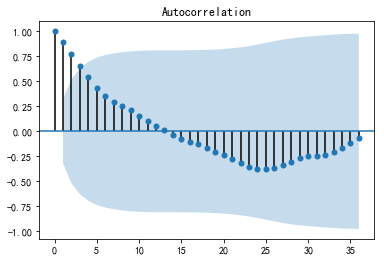

In [17]:
# plot_acf() 绘制自相关系数图
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data).show()

In [28]:
# pacf() 计算偏自相关系数
from statsmodels.tsa.stattools import pacf
pacf(x=data.loc[:, '销量'])

D:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1127: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
D:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1119: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k]*X[k:]).sum() / denom(k)


LinAlgError: Singular matrix

D:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


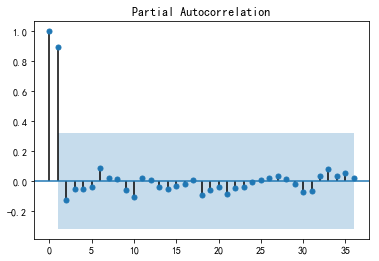

In [23]:
# plot_pacf() 绘制偏自变量系数图
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data).show()

In [26]:
# adfuller() 单位根检测
from statsmodels.tsa.stattools import adfuller
adfuller(data.loc[:, '销量'])

(1.8137710150945274,
 0.9983759421514264,
 10,
 26,
 {'1%': -3.7112123008648155,
  '10%': -2.6300945562130176,
  '5%': -2.981246804733728},
 299.46989866024177)

In [30]:
# diff() 差分计算
data.diff()

,销量
日期,
2015-01-01,NaN
2015-01-02,16.0
2015-01-03,17.0
2015-01-04,82.0
2015-01-05,50.0
2015-01-06,36.0
2015-01-07,2.0
2015-01-08,-197.0
2015-01-09,-170.0


In [39]:
# ARIMA() 创建 ARIMA 模型
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(data, (2,1,2)).fit()

TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [31]:
# summary() 或 summaty2() 给出一份 ARIMA 模型的报告

In [32]:
# aic / bic / hqic 计算 ARIMA 模型的 AIC/BIC/HQIC 指标值

In [33]:
# forecast() 应用构建的时序模型进行预测

In [36]:
# acorr_ljungbox() Ljung-Box 检测，检测是否为白噪声
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(data, lags=1)

(array([32.0111333]), array([1.53291527e-08]))